<a href="https://colab.research.google.com/github/ShrungaM/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

##**Importing the necessary libraries and reading the file**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Importing Warnings To Ignore the Warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python/datasets/Hotel Bookings.csv')
# df = pd.read_csv('/content/drive/MyDrive/Data/Hotel Bookings.csv')    #Path for Sneha

In [ ]:
# Functions used in this project for outlier determination (Not to Plot The Same Thing Again and Again)  
""" Visualize the Numerical Features """
def visualize_num_feature(df):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.subplot(1,2,2)
    sns.distplot(df, bins=20)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(df):
    stat =  df.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))

##**Data Exploration**

In [ ]:
# First Look
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Familiarise with the columns in the dataset and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Statistics of the dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Finding Any Null Value Present in the data set
df.isnull().values.any()

True

In [ ]:
# Total Number Of Count Of Null Values Present In The Respective Columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Checking the percentage of null values present in the dataset
df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

####we see that there are 119390 records out of which columns agent and company has the most missing values.

##**Data Cleaning**

####After our first look at the dataset, since agent and company columns has the most number of missing values, lets not consider these columns in our analysis. So lets go and drop these columns.

In [ ]:
#dropping agent and company columns
df.drop(['agent','company'],axis=1,inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


####Let us move further. We can see that the arrival date is not in the correct format. So we can create one more column with correct date format

In [ ]:
#Converting the columns to string datatype 
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('string')
df['arrival_date_month'] = df['arrival_date_month'].astype('string')
df['arrival_date_year'] = df['arrival_date_year'].astype('string')

In [ ]:
#Concatenating the columns and again converting it to datetime
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [ ]:
df['arrival_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

####Also convert reservation_status_date into date format

In [ ]:
#Converting to datetime datatype
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']) 

####Now let us shift our focus to the very first column in our dataset i.e, is_canceled. As the name suggests this column says if the booking is cancelled or not.

In [ ]:
#Lets us see what all values this column contains
df['is_canceled'].unique()

array([0, 1])

#####Let us consider value 0 as bookings that are not cancelled and 1 as cancelled bookings.

####Let us move to the next column (lead_time). Lead time is the time between booking(reservation) made and the actual arrival. 
Seems interesting isn't it. Let us know more about this column.
Usually lead time is given in days

Visulaize lead_time Feature


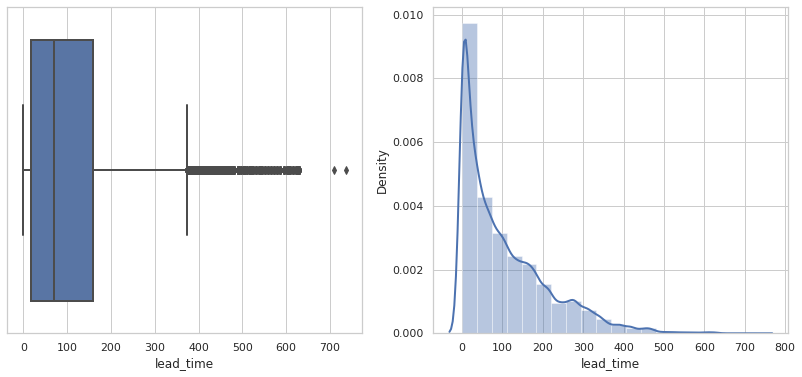

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64
The upper and lower bounds for suspected outliers are 373.0 and -195.0


In [ ]:
### lead_time
print('Visulaize lead_time Feature')
visualize_num_feature(df.lead_time)
stat_summary(df.lead_time)

#####as we can observe, lead time has the maximun value of 737 and median of 69 days.
We can say that lead time greater than 200 days is quiet unusual.
Nobody books a hotel before 200 days(almost 6 months) earlier

In [ ]:
# find all the lead time greater than 200
df.loc[df['lead_time']>200,'lead_time']

0         342
1         737
81        368
82        364
85        324
         ... 
119369    207
119370    201
119374    201
119378    247
119389    205
Name: lead_time, Length: 20647, dtype: int64

#####we have 20647 records out of 119390 where lead time is greater than 200. So Replacing them with median of lead time less than 200.

In [ ]:
#Find the index where lead_time is greater than 200 and replace the with lead_time less than equal to 200
df.loc[df['lead_time']>200,'lead_time']=df.loc[df['lead_time']<=200,'lead_time'].median()
#After replacing the data type is changed to float. change it back to int again 
df['lead_time'] = df['lead_time'].astype('int')                                          

In [ ]:
type(df['lead_time'][0])

numpy.int64

###  Stays_in_week_nights

In [ ]:
df['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

Visualize stays_in_week_nights Feature


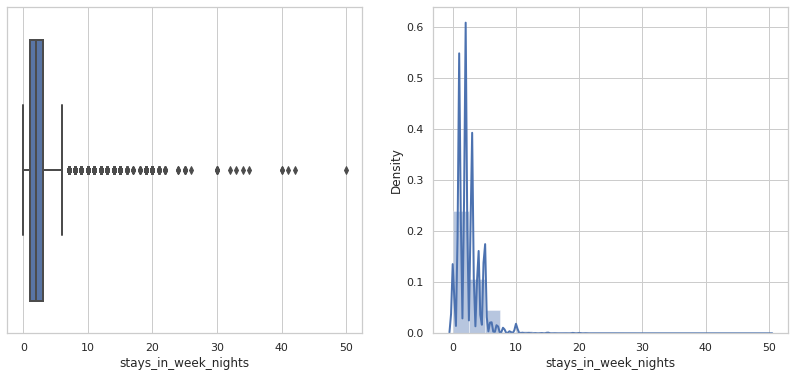

count    119390.000000
mean          2.500302
std           1.908286
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64
The upper and lower bounds for suspected outliers are 6.0 and -2.0


In [ ]:
### stays_in_week_nights
print('Visualize stays_in_week_nights Feature')
visualize_num_feature(df.stays_in_week_nights)
stat_summary(df.stays_in_week_nights)

In [ ]:
# Replacing The greater than 10 values with median value
df.loc[df.stays_in_week_nights > 6, 'stays_in_week_nights'] = df.loc[df['stays_in_week_nights']<=6,'stays_in_week_nights'].median()

###  Stays_in_weekend_nights

In [ ]:
df['stays_in_week_nights'].unique()

array([0, 1, 2, 3, 4, 5, 6])

Visulaize stays_in_weekend_nights Feature


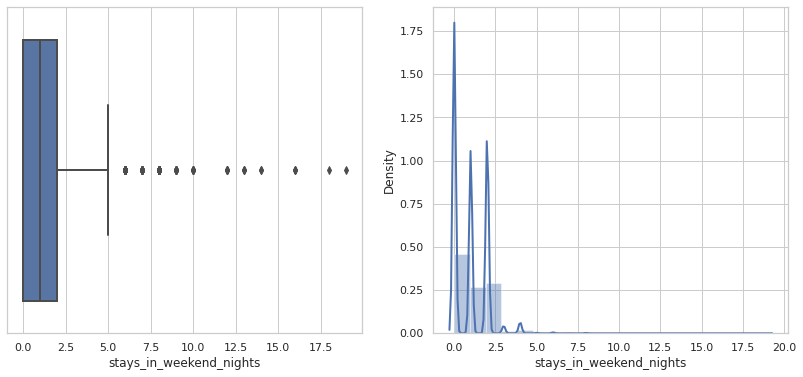

count    119390.000000
mean          0.927599
std           0.998613
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: stays_in_weekend_nights, dtype: float64
The upper and lower bounds for suspected outliers are 5.0 and -3.0


In [ ]:
### stays_in_weekend_nights
print('Visulaize stays_in_weekend_nights Feature')
visualize_num_feature(df.stays_in_weekend_nights)
stat_summary(df.stays_in_weekend_nights)

In [ ]:
# Replacing The greater than 5 values with median value
df.loc[df.stays_in_weekend_nights > 5, 'stays_in_weekend_nights'] = df.loc[df['stays_in_weekend_nights']<=5,'stays_in_weekend_nights'].median()

###Moving forward we can create one more column to calculate total stay of guests by adding stay_in_weekend_nights and stay_in_week_nights

In [ ]:
df['stay_duration']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [ ]:
df['stay_duration'].value_counts()

2     27643
3     27341
1     21020
4     18331
7      8734
5      8432
6      5271
8      1161
0       715
9       395
10      347
Name: stay_duration, dtype: int64

#####Stay duration 0 means that the guests didn't stay in the night.
This does not indicate absurd data

###Lets move on to days_in_waiting_list column. As the name suggests this column has the number of days the booking was kept in waiting list before it was confirmed by the hotel.

In [ ]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

#####Since we replace lead_time <200, now it makes no sense if the days in waiting list column has data greater than 200 
(we dont have bookings made before 200 days of arrival, so waiting time cant be more than 200 days)

In [ ]:
#Find the index where days_in_waiting_list is greater than 200 and replace the with days_in_waiting_list less than equal to 200 
df.loc[df['days_in_waiting_list']>200,'days_in_waiting_list'] = df.loc[df['days_in_waiting_list']<=200,'days_in_waiting_list'].median()                  
                                                                   

In [ ]:
#After replacing, the data type is chaged to float. change it back to int again
df['days_in_waiting_list'] = df['days_in_waiting_list'].astype('int')

###Lets understand about the adr column
ADR means the average daily revenue (daily revenue the hotel manages to collect from all the rooms on an average)

Visulaize adr Feature


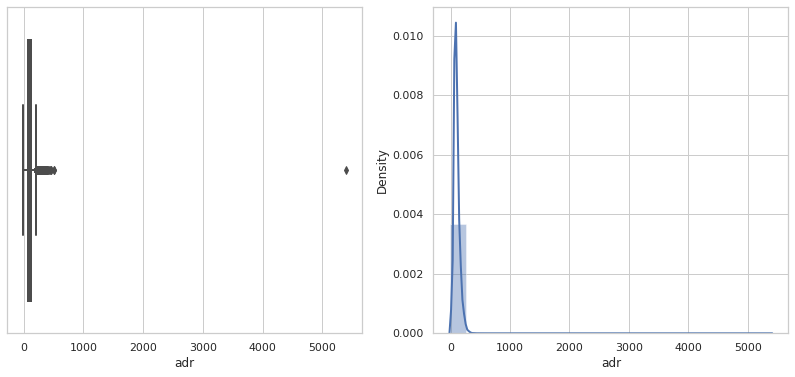

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64
The upper and lower bounds for suspected outliers are 211.065 and -15.774999999999991


In [ ]:
### adr
print('Visulaize adr Feature')
visualize_num_feature(df.adr)
stat_summary(df.adr)

#####we can see that there are outliers

#####There is one resort hotel that is having negative adr.
Hotel that is running in loss

In [ ]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05,10


#####We can consider values above 400 and below 0 as outliers from the above plot

In [ ]:
# Finding all the outlier index
outliers_index = list(df[(df['adr']>400) | (df['adr']<0)].index)   
outliers_index

[13142, 13391, 14969, 15083, 39155, 39568, 48515, 103912, 111403]

In [ ]:
#Dropping the outliers
df.drop(outliers_index,axis=0,inplace=True) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119381 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119381 non-null  object        
 1   is_canceled                     119381 non-null  int64         
 2   lead_time                       119381 non-null  int64         
 3   arrival_date_year               119381 non-null  string        
 4   arrival_date_month              119381 non-null  string        
 5   arrival_date_week_number        119381 non-null  int64         
 6   arrival_date_day_of_month       119381 non-null  string        
 7   stays_in_weekend_nights         119381 non-null  int64         
 8   stays_in_week_nights            119381 non-null  int64         
 9   adults                          119381 non-null  int64         
 10  children                        119377 non-null  float64

###Moving on to customer_type, market_segment, distribution_channel,is_repeated_guest

In [ ]:
# checking the Unique Values of columns
list1 = ['customer_type','market_segment','distribution_channel' , 'is_repeated_guest' ]

for i in list1:
  print(i)
  print(df[i].unique())
  print("-----------------------")

customer_type
['Transient' 'Contract' 'Transient-Party' 'Group']
-----------------------
market_segment
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
-----------------------
distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
-----------------------
is_repeated_guest
[0 1]
-----------------------


#####As there are no null values in these columns, there is no need to manipulate these columns

###Lets us move to the column country now

This indicates the location of the resort.

Since there are only 488 (0.40%) null values in this column, we can drop the null records

In [ ]:
#fetching the index of country with null values
country_null_index = list(df.loc[df['country'].isnull()].index)  

In [ ]:
#dropping countries with null values
df.drop(country_null_index,axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118893 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118893 non-null  object        
 1   is_canceled                     118893 non-null  int64         
 2   lead_time                       118893 non-null  int64         
 3   arrival_date_year               118893 non-null  string        
 4   arrival_date_month              118893 non-null  string        
 5   arrival_date_week_number        118893 non-null  int64         
 6   arrival_date_day_of_month       118893 non-null  string        
 7   stays_in_weekend_nights         118893 non-null  int64         
 8   stays_in_week_nights            118893 non-null  int64         
 9   adults                          118893 non-null  int64         
 10  children                        118889 non-null  float64

###Moving on to booking_changes column

More than 10 booking changes in a single booking is unusual. So lets replace those values with the median

In [ ]:
#replacing booking changes more than 10 with median value
df.loc[df['booking_changes']>=10,'booking_changes'] = df.loc[df['booking_changes']<10,'booking_changes'].median()    

In [ ]:
#changing the datatype back to int
df['booking_changes'] = df['booking_changes'].astype('int')

In [ ]:
#checking the values in booking changes column after manipulation
df['booking_changes'].value_counts()

0    100932
1     12636
2      3788
3       925
4       375
5       118
6        63
7        31
8        17
9         8
Name: booking_changes, dtype: int64

###Cleaning the children, babies and adults column

Since there are only 0.003% null values in this column, assigning them to 0

In [ ]:
df.loc[df['children'].isnull(),'children']=0     # assigned children null values to zero     
df['children']=df['children'].astype('int')      # changed datatype of children from float to int

In [ ]:
df['babies'].value_counts()

0     117979
1        898
2         14
10         1
9          1
Name: babies, dtype: int64

In [ ]:
df['adults'].value_counts()

2     89491
1     22734
3      6197
0       393
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
df['children'].value_counts()

0     110318
1       4851
2       3647
3         76
10         1
Name: children, dtype: int64

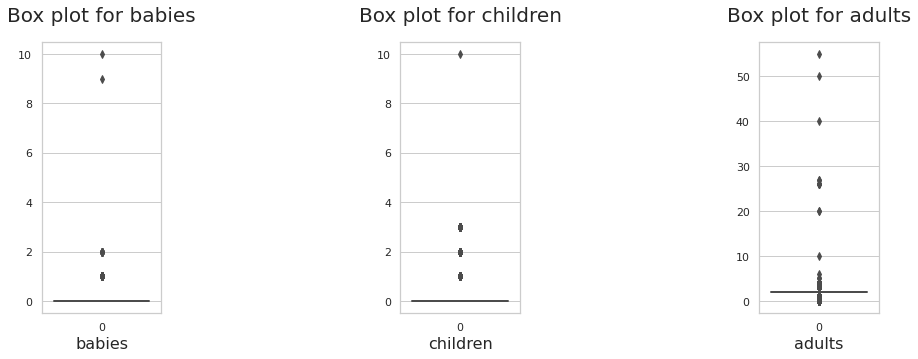

In [ ]:
#box plot for outlier detection in babies, children and adults
req_list = ['babies','children','adults']
n=1
plt.figure(figsize=(15,5))
for i in req_list:
  plt.subplot(1,3,n)
  plt.title("Box plot for "+i,fontsize=20,pad=20)
  n = n+1
  sns.boxplot(data = df[i])
  plt.xlabel(i, fontsize=16)
  plt.subplots_adjust(wspace=2)

#####Dropping the outliers

In [ ]:
members_outlier_list = list(df[(df['babies']>5) | (df['children']>5) | (df['adults']>10)].index)  

In [ ]:
df.drop(members_outlier_list,axis=0,inplace=True)

In [ ]:
#As there wont be any children coming to vacation without adults/parents dropping them

var = list(df[(df['adults']==0)&((df['children']!=0)|(df['babies']!=0))].index)
df.drop(var,axis=0,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118655 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118655 non-null  object        
 1   is_canceled                     118655 non-null  int64         
 2   lead_time                       118655 non-null  int64         
 3   arrival_date_year               118655 non-null  string        
 4   arrival_date_month              118655 non-null  string        
 5   arrival_date_week_number        118655 non-null  int64         
 6   arrival_date_day_of_month       118655 non-null  string        
 7   stays_in_weekend_nights         118655 non-null  int64         
 8   stays_in_week_nights            118655 non-null  int64         
 9   adults                          118655 non-null  int64         
 10  children                        118655 non-null  int64  

###Creating total_members column (consolidating the total visitors)

In [ ]:
#summing up the columns adults, babies and children to get the total members visited
df['Total_members'] = df['adults'] + df['babies'] + df['children']

In [ ]:
df['Total_members'].value_counts().sort_index()

0       170
1     22284
2     81674
3     10466
4      3922
5       137
6         1
10        1
Name: Total_members, dtype: int64

#####As we can see 170 records contain total members as 0, it will be irrelavent for our analysis. Hence dropping them

In [ ]:
#Find the index where the total members column is 0
irrelavent_total_members = list(df[df['Total_members']==0].index)  

In [ ]:
len(irrelavent_total_members)

170

In [ ]:
#dropping the irrelavent records
df.drop(irrelavent_total_members,axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118485 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118485 non-null  object        
 1   is_canceled                     118485 non-null  int64         
 2   lead_time                       118485 non-null  int64         
 3   arrival_date_year               118485 non-null  string        
 4   arrival_date_month              118485 non-null  string        
 5   arrival_date_week_number        118485 non-null  int64         
 6   arrival_date_day_of_month       118485 non-null  string        
 7   stays_in_weekend_nights         118485 non-null  int64         
 8   stays_in_week_nights            118485 non-null  int64         
 9   adults                          118485 non-null  int64         
 10  children                        118485 non-null  int64  

###Conclusion after wrangling

In [ ]:
#resetting the index after all the cleaning
df=df.reset_index().drop('index',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118485 entries, 0 to 118484
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118485 non-null  object        
 1   is_canceled                     118485 non-null  int64         
 2   lead_time                       118485 non-null  int64         
 3   arrival_date_year               118485 non-null  string        
 4   arrival_date_month              118485 non-null  string        
 5   arrival_date_week_number        118485 non-null  int64         
 6   arrival_date_day_of_month       118485 non-null  string        
 7   stays_in_weekend_nights         118485 non-null  int64         
 8   stays_in_week_nights            118485 non-null  int64         
 9   adults                          118485 non-null  int64         
 10  children                        118485 non-null  int64  

#####After cleaning 118485 records remained for analysis, meaning 99.24 % data is cleaned and retained

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


##**Data Analysis and Visualization (EDA)**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


####Number of Bookings made in each country


In [ ]:
### importing plotly for geoplot
import plotly.express as px

In [ ]:
# Total Number Of Booking List made in each country if the Cancelltion is not done by The Guest 
country_data = df[df['is_canceled']==0]['country'].value_counts().reset_index()

In [ ]:
# Need only Two Columns 
country_data.columns = ['country','no_of_bookings']

In [ ]:
# First Look
country_data.head()

,country,no_of_bookings
0,PRT,20942
1,GBR,9654
2,FRA,8448
3,ESP,6372
4,DEU,6056


In [ ]:
# Geoplot Map for No of Booking Per Country
px.choropleth(country_data,
              locations=country_data['country'],
              color=country_data['no_of_bookings'],
              hover_name=country_data['country'],
              title='Number of Bookings per Country')

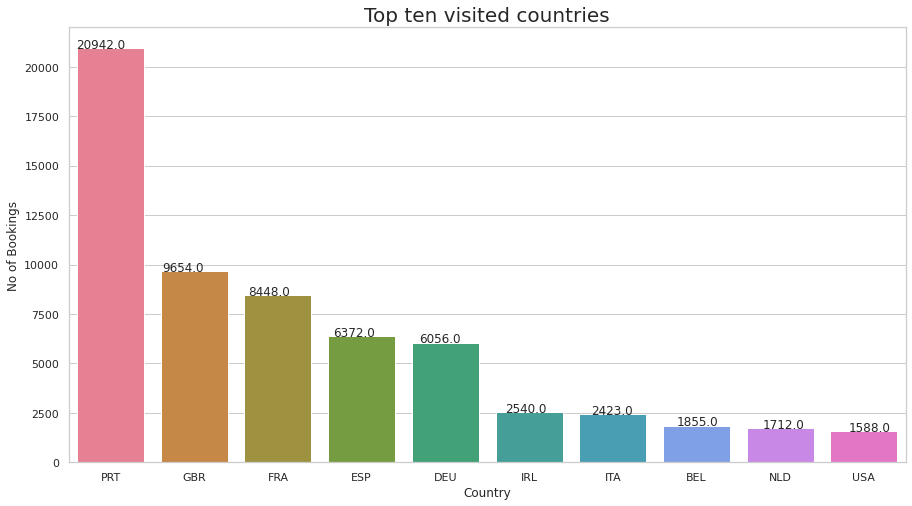

In [ ]:
# Bar Plot For Top Ten Country

sns.set(style='whitegrid') # adding gridlines in the graphs (white, dark, whitegrid, darkgrid, ticks)
plt.figure(figsize=(15, 8))
plt.title("Top ten visited countries", fontsize=20)
ax=sns.barplot(x = country_data['country'][:10],
            y = country_data['no_of_bookings'][:10],palette="husl")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() ))
plt.xlabel("Country")
plt.ylabel("No of Bookings")
plt.show()


#####Conclusion
    Most visited country is portugal and europe is the most favourite vacation spot.



#### What is the highest revenue collected ?

In [ ]:
# Creating New Dataset "data2" for data analysis of pay for room per night 
data2 = df[df['is_canceled']==0]


In [ ]:
# First Look
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


##### Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.*

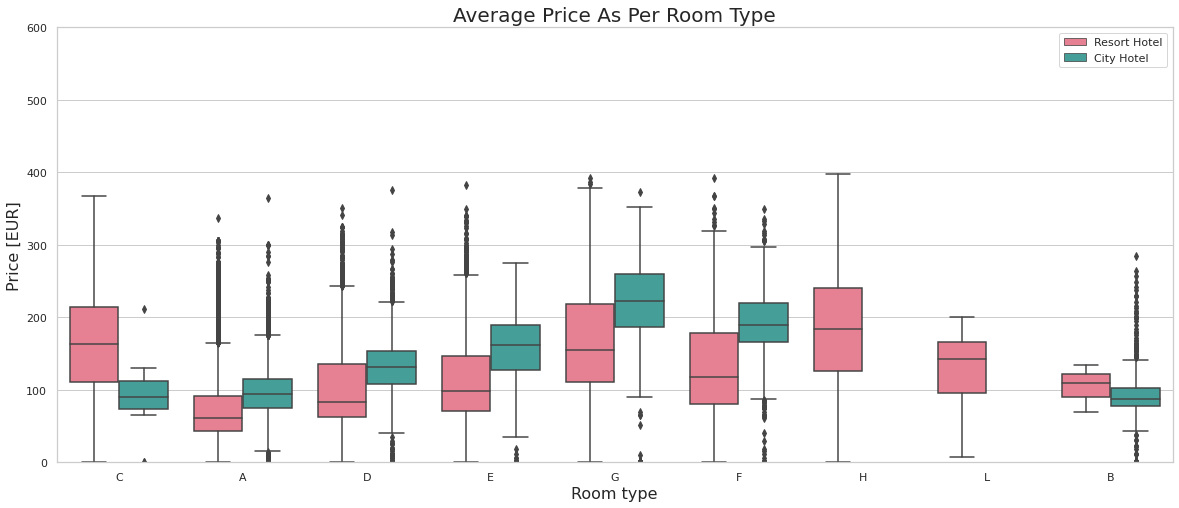

In [ ]:
# Box Plot
plt.figure(figsize=(20,8))
sns.boxplot(x='reserved_room_type',y='adr',data=df,hue='hotel',palette="husl")
plt.title("Average Price As Per Room Type", fontsize=20)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

#####conclusion --->>
   
    Room type 'G' in City Hotel have more average price as compered to other room type.
    In Resort Hotel type 'H' has shown the Highest average price among other room type.








####Variation of ADR across months

In [ ]:
# Seprating the Data set on Reort And City Hotel When The Cancellation is "Zero"
# Zero means The Cancellation Not Done By The Guests

# Resort Hotel Data  seprated when the cancellation is not done
resort = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]

# City Hotel Data  seprated when the cancellation is not done
city = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]


In [ ]:
# data_resort have the data of Resort hotel if the cancellation is not done by the Guests
data_resort = resort[resort['is_canceled']==0]


In [ ]:
# data_city have the data of City hotel if the cancellation is not done by the Guests
data_city = city[city['is_canceled']==0]



In [ ]:
# First Look For Resort Hotel
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


In [ ]:
# First Look For City Hotel
data_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
39566,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,Transient,0.00,0,0,Check-Out,2015-07-03,2015-07-01,2,1
39572,City Hotel,0,3,2015,July,27,2,0,3,1,...,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05,2015-07-02,3,1
39576,City Hotel,0,43,2015,July,27,3,0,2,2,...,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2,2
39577,City Hotel,0,43,2015,July,27,3,0,2,2,...,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05,2015-07-03,2,2
39578,City Hotel,0,43,2015,July,27,3,0,2,2,...,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2,2


In [ ]:
# adr(average daily rate) mean value grouped on the monthly basis of resort hotel 
resort_hotel = data_resort.groupby('arrival_date_month')['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,76.176140
1,August,181.204804
2,December,68.634584
3,February,54.468180
4,January,48.994018
5,July,150.368559
6,June,108.133154
7,March,57.433661
8,May,76.734804
9,November,48.882907


In [ ]:
# adr(average daily rate) mean value grouped on the monthly basis of city hotel 
city_hotel = data_city.groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,112.051521
1,August,118.822782
2,December,88.365618
3,February,86.610790
4,January,82.629924
5,July,116.019800
6,June,117.890405
7,March,90.681123
8,May,120.586425
9,November,86.949577


In [ ]:
# Creating new data set three different columns according to the need
final_data = resort_hotel.merge(city_hotel, on = 'arrival_date_month' )
final_data.columns = ['Month','Resort_Hotel_Price','City_Hotel_Price']

##### Now we will observe over here is month columns is not in order, & if we will visualise we will get improper conclusion so very first we have to provide right hierarchy to the month columns 

In [ ]:
# First Look For Final Prices According to Hotels
final_data.head()

,Month,Resort_Hotel_Price,City_Hotel_Price
0,April,76.176140,112.051521
1,August,181.204804,118.822782
2,December,68.634584,88.365618
3,February,54.468180,86.610790
4,January,48.994018,82.629924


In [ ]:
# Since the the months are not arranged in the proper order arranging them with the help of 'sort-dataframeby-monthorweek' and 
#'sorted-months-weekdays' libraries.
%pip install sort-dataframeby-monthorweek
%pip install sorted-months-weekdays


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing Library
import sort_dataframeby_monthorweek as sd

In [ ]:
# arranging data in the proper manner for better analysis 
Final_Data_Arrange = sd.Sort_Dataframeby_Month(final_data,'Month')
Final_Data_Arrange

,Month,Resort_Hotel_Price,City_Hotel_Price
0,January,48.994018,82.629924
1,February,54.468180,86.610790
2,March,57.433661,90.681123
3,April,76.176140,112.051521
4,May,76.734804,120.586425
5,June,108.133154,117.890405
6,July,150.368559,116.019800
7,August,181.204804,118.822782
8,September,96.288897,112.760640
9,October,61.932777,102.049473


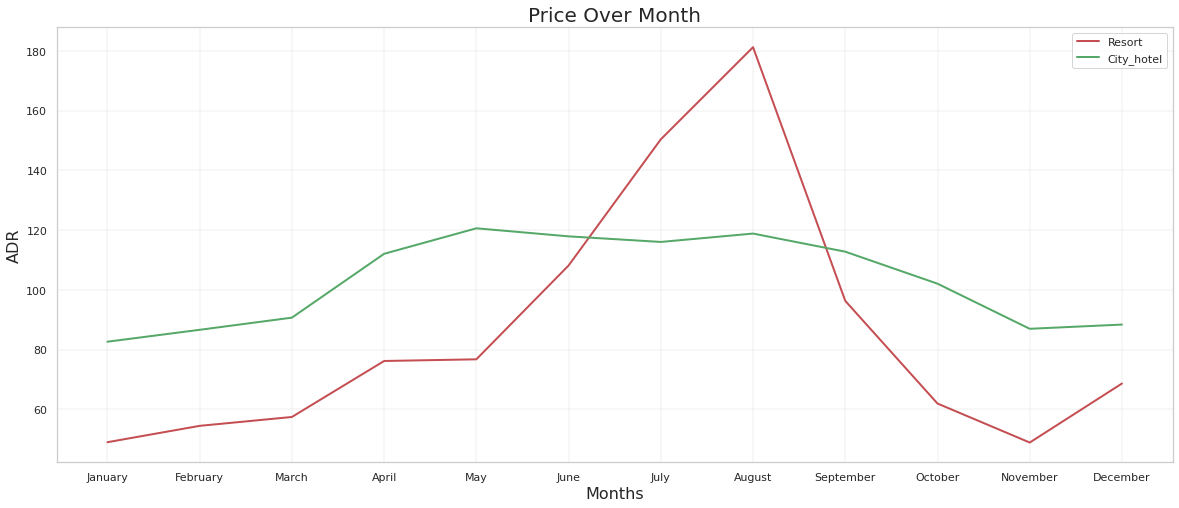

In [ ]:
# Line Plot
from cycler import cycler
plt.rc('lines', linewidth=2)

plt.figure(figsize=(20,8))
#plt.style.use(['dark_background'])
plt.plot(Final_Data_Arrange['Month'],Final_Data_Arrange['Resort_Hotel_Price'],label='Resort',color="r")
plt.plot(Final_Data_Arrange['Month'],Final_Data_Arrange['City_Hotel_Price'],label='City_hotel',color="g")
plt.grid(linewidth=.3)
plt.title("Price Over Month", fontsize=20)
plt.xlabel("Months", fontsize=16)
plt.ylabel("ADR", fontsize=16)
plt.legend(loc="upper right")

plt.show()

#####*Conclusion* (Need to check for seasons)
    This clearly shows that the prices in the Resort hotel are much higher during August.
    The price of the city hotel varies less and is most expensive during From May to August.

####What meal do guests prefer?

In [ ]:
# Meal Data list
df['meal'].value_counts()

BB           91559
HB           14421
SC           10544
Undefined     1164
FB             797
Name: meal, dtype: int64

In [ ]:
# Hollow Pie Plot
px.pie(df,values=df['meal'].value_counts(),names=df['meal'].value_counts().index,hole=0.2,title='Meal Analysis')

##### Conclusion-->>

    Most Of People Prefer for Bed & Breakfast.

####Analyse Special Request done by Customers ?

In [ ]:
# first look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


In [ ]:
# Hollow Pie Plot
px.pie(df,values=df['total_of_special_requests'].value_counts(),names=df['total_of_special_requests'].value_counts().index,title="Total no of special requests")

##### Conclusion-->> 
    More than 50% of bookings don't have any special requests
    

#### In which months Guests are high?


In [ ]:
# Creating the list of total number of Guest According the munber of months for Resort Hotel analysis
resort_rush = data_resort['arrival_date_month'].value_counts().reset_index()
resort_rush.columns=(['Month','No_Of_Guest_In_Resort'])
resort_rush

,Month,No_Of_Guest_In_Resort
0,August,3235
1,July,3109
2,October,2528
3,May,2523
4,April,2518
5,March,2516
6,February,2253
7,September,2077
8,June,2026
9,December,1970


In [ ]:
# Creating the list of total number of Guest According the munber of months for City Hotel analysis
city_rush = data_city['arrival_date_month'].value_counts().reset_index()
city_rush.columns=(['Month','No_Of_Guest_In_City'])
city_rush

,Month,No_Of_Guest_In_City
0,August,5346
1,July,4747
2,May,4559
3,June,4349
4,October,4311
5,September,4279
6,March,4043
7,April,3997
8,February,3039
9,November,2673


In [ ]:
# Merging data Of City and  Resort according to the Month
final_rush = resort_rush.merge(city_rush,on='Month')
final_rush

,Month,No_Of_Guest_In_Resort,No_Of_Guest_In_City
0,August,3235,5346
1,July,3109,4747
2,October,2528,4311
3,May,2523,4559
4,April,2518,3997
5,March,2516,4043
6,February,2253,3039
7,September,2077,4279
8,June,2026,4349
9,December,1970,2362


In [ ]:
# Sorting the Month in proper manner for better Analysis 
Final_rush_Data_Arrange = sd.Sort_Dataframeby_Month(final_rush,'Month')
Final_rush_Data_Arrange

,Month,No_Of_Guest_In_Resort,No_Of_Guest_In_City
0,January,1812,2234
1,February,2253,3039
2,March,2516,4043
3,April,2518,3997
4,May,2523,4559
5,June,2026,4349
6,July,3109,4747
7,August,3235,5346
8,September,2077,4279
9,October,2528,4311


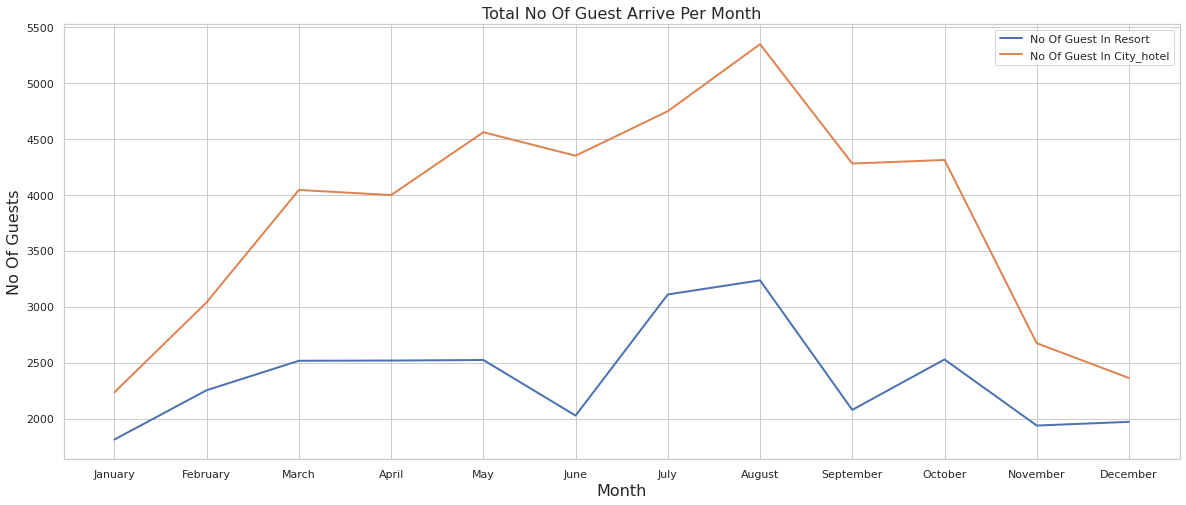

In [ ]:
# line Plot
plt.figure(figsize=(20,8))
plt.plot(Final_rush_Data_Arrange['Month'],Final_rush_Data_Arrange['No_Of_Guest_In_Resort'],label='No Of Guest In Resort')
plt.plot(Final_rush_Data_Arrange['Month'],Final_rush_Data_Arrange['No_Of_Guest_In_City'],label='No Of Guest In City_hotel')
plt.grid(True)
plt.title("Total No Of Guest Arrive Per Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No Of Guests", fontsize=16)
plt.legend(loc="upper right")
plt.show()

##### Conclusion --->>
    The hotels has more guests during spring and autumn 
    
    Guest numbers for the Resort hotel go down slighty from summer and autumn, which is also when the prices are highest.
    Both hotels have the fewest guests during the winter.

#### In which hotel do guest prefer to stay more?

In [ ]:
# filtering out the value
not_cancelled_df = df[df['is_canceled']==0]

In [ ]:
# first look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


In [ ]:
# first look
not_cancelled_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


In [ ]:
# Creating Columns
stay_duration_df=not_cancelled_df[['hotel','stay_duration']]
stay_duration_df.head()

,hotel,stay_duration
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,1
3,Resort Hotel,1
4,Resort Hotel,2


In [ ]:
# Grouping the data
stay_duration_df1= stay_duration_df.groupby(['hotel'])['stay_duration'].sum().reset_index()
stay_duration_df1

,hotel,stay_duration
0,City Hotel,132150
1,Resort Hotel,104709


In [ ]:
# listing the data of hotel
hotels=list(stay_duration_df1['hotel'])
durations=list(stay_duration_df1['stay_duration'])

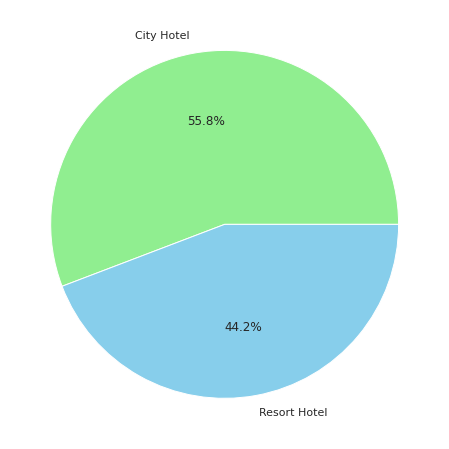

In [ ]:
# bar plot
plt.figure(figsize=(15,8))
plt.pie(durations,labels=hotels,autopct='%1.1f%%',colors=['lightgreen','skyblue'])
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
plt.show()

#####Conclustion : Although city hotel holds the upper hand, bookings are almost equal in both the hotels.

####Bookings by Market Segment

In [ ]:
# First Look Of Columns
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members'],
      dtype='object')

In [ ]:
# Exploring Market Segment Data
data2['market_segment'].value_counts()

Online TA        35485
Offline TA/TO    15851
Direct           10480
Groups            7691
Corporate         4119
Complementary      634
Aviation           183
Name: market_segment, dtype: int64

In [ ]:
# Pie Plot

px.pie(data2,values=data2['market_segment'].value_counts(),names=data2['market_segment'].value_counts().index,title='Booking Per Market Segment')

#####*Conclusion*
    Most Of The Booking Is Through Travel Agencies , Preferably Online Mode


####Demand for different Room type

In [ ]:
# Grouping the data for analysis
room_type = not_cancelled_df.groupby(['reserved_room_type','hotel']).agg('count').reset_index()
room_count = room_type.iloc[:,0:3]

In [ ]:
# First look
room_count

,reserved_room_type,hotel,is_canceled
0,A,City Hotel,35228
1,A,Resort Hotel,16665
2,B,City Hotel,619
3,B,Resort Hotel,3
4,C,City Hotel,8
5,C,Resort Hotel,614
6,D,City Hotel,7599
7,D,Resort Hotel,5450
8,E,City Hotel,1036
9,E,Resort Hotel,3540


In [ ]:
# Renaming the columns
room_count.rename(columns={'is_canceled':'Count'},inplace=True)
room_count

,reserved_room_type,hotel,Count
0,A,City Hotel,35228
1,A,Resort Hotel,16665
2,B,City Hotel,619
3,B,Resort Hotel,3
4,C,City Hotel,8
5,C,Resort Hotel,614
6,D,City Hotel,7599
7,D,Resort Hotel,5450
8,E,City Hotel,1036
9,E,Resort Hotel,3540


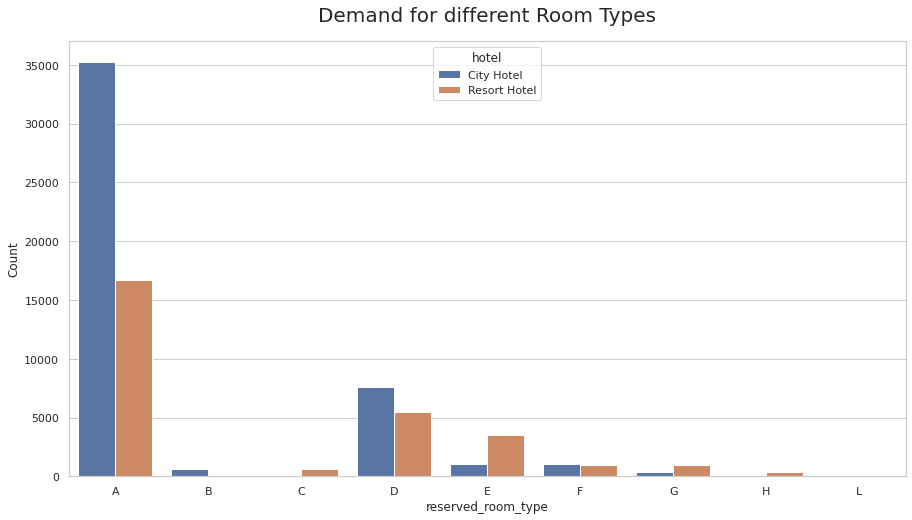

In [ ]:
# Bar Plot
plt.figure(figsize=(15,8))
plt.title('Demand for different Room Types',fontsize=20,pad=20)
sns.barplot(x = room_count['reserved_room_type'],y=room_count['Count'],hue=room_count['hotel'])
plt.show()

#####Conclusion
    Demand for room type A both hotels is highest.

####Which Hotel Has Highest Number Of Cancellation?

In [ ]:
# First Look To Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members'],
      dtype='object')

In [ ]:
# Exploring The cancelled Data 
canceled = df[df['is_canceled']==1]

In [ ]:
# Length of the Cancelled data for Resort Hotel 
len(canceled[canceled['hotel']=='Resort Hotel'])

11062

In [ ]:
# Length of the Cancelled data for City Hotel 
len(canceled[canceled['hotel']=='City Hotel'])

32980

In [ ]:
# Hollo Pie Plot 
px.pie(canceled,values=[11120,33079],names=['Resort_Hotel_Cancelltion','City_Hotel_Cancellation'],hole=.5,title='Booking Cancelled')

#####*Conclusion*

    More Number of cancellation done in City Hotel, compared to the Resort Hotel. 

####Which Month Has The Highest No Of Booking

In [ ]:
not_cancelled_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
118480,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,7,2
118481,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,7,3
118482,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,7,2
118483,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,7,2
118484,City Hotel,0,48,2017,August,35,29,2,2,2,...,0,Transient,151.20,0,2,Check-Out,2017-09-07,2017-08-29,4,2


In [ ]:
# Creating New Data frame For Cancellation According to the month for both Resort Hotel and City Hotel
cancel_month_df = not_cancelled_df.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled_dff = cancel_month_df.iloc[:,0:3]

In [ ]:
cancelled_dff

,arrival_date_month,hotel,is_canceled
0,April,City Hotel,3997
1,April,Resort Hotel,2518
2,August,City Hotel,5346
3,August,Resort Hotel,3235
4,December,City Hotel,2362
5,December,Resort Hotel,1970
6,February,City Hotel,3039
7,February,Resort Hotel,2253
8,January,City Hotel,2234
9,January,Resort Hotel,1812


In [ ]:
# Renaming The Columns
cancelled_dff = cancelled_dff.rename(columns={'is_canceled':'no of bookings'})
cancelled_dff

,arrival_date_month,hotel,no of bookings
0,April,City Hotel,3997
1,April,Resort Hotel,2518
2,August,City Hotel,5346
3,August,Resort Hotel,3235
4,December,City Hotel,2362
5,December,Resort Hotel,1970
6,February,City Hotel,3039
7,February,Resort Hotel,2253
8,January,City Hotel,2234
9,January,Resort Hotel,1812


In [ ]:
# Arranging The Data According to the Months
final_cancelled_df = sd.Sort_Dataframeby_Month(cancelled_dff,'arrival_date_month')
final_cancelled_df

,arrival_date_month,hotel,no of bookings
0,January,City Hotel,2234
1,January,Resort Hotel,1812
2,February,City Hotel,3039
3,February,Resort Hotel,2253
4,March,City Hotel,4043
5,March,Resort Hotel,2516
6,April,City Hotel,3997
7,April,Resort Hotel,2518
8,May,City Hotel,4559
9,May,Resort Hotel,2523


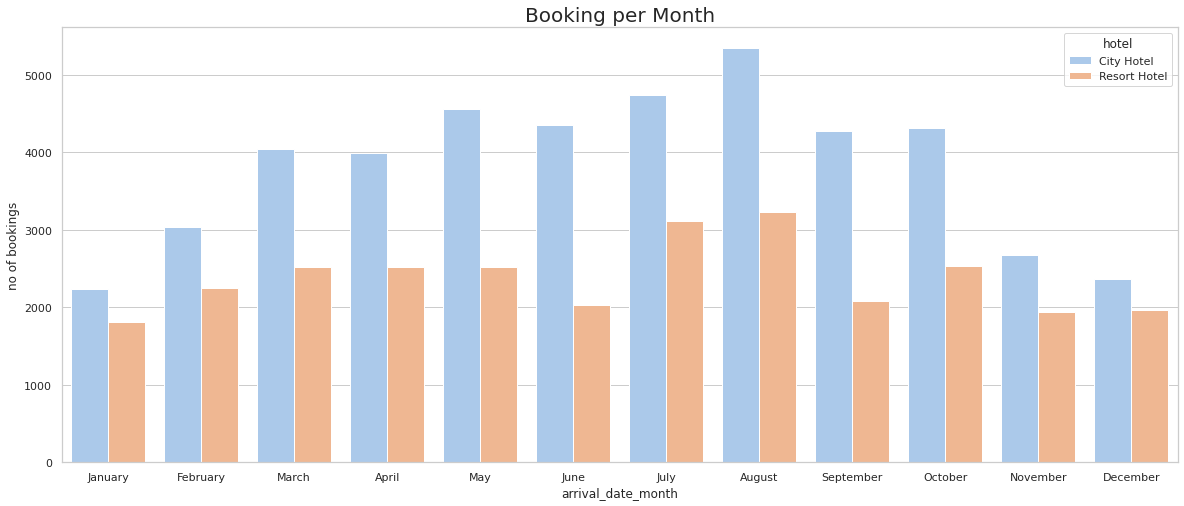

In [ ]:
# Bar Plot
plt.figure(figsize=(20, 8))
plt.title('Booking per Month',fontsize=20)
sns.barplot(x = "arrival_date_month", y = "no of bookings" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=final_cancelled_df,palette="pastel")
plt.show()

##### Conclusion
Both City and Resort Hotel has highest booking in August.

####Which Month Has The Highest No Of Cancellation

In [ ]:
# Looking columns
canceled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'stay_duration', 'Total_members'],
      dtype='object')

In [ ]:
# first look
canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01,3,2
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,Transient,105.5,0,0,Canceled,2015-04-22,2015-07-01,3,2
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,Transient,123.0,0,0,Canceled,2015-06-23,2015-07-01,4,2
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,Transient,107.0,0,2,Canceled,2015-05-11,2015-07-01,7,2
31,Resort Hotel,1,96,2015,July,27,1,2,2,2,...,0,Transient,108.3,0,2,Canceled,2015-05-29,2015-07-01,4,2


In [ ]:
# Checking Unique Data
canceled['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# Creating New Data frame For Cancellation According to the month for both Resort Hotel and City Hotel
cancel_month = canceled.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled = cancel_month.iloc[:,0:3]

In [ ]:
# First Look
cancelled

,arrival_date_month,hotel,is_canceled
0,April,City Hotel,3451
1,April,Resort Hotel,1051
2,August,City Hotel,3589
3,August,Resort Hotel,1634
4,December,City Hotel,1728
5,December,Resort Hotel,626
6,February,City Hotel,1893
7,February,Resort Hotel,794
8,January,City Hotel,1477
9,January,Resort Hotel,324


In [ ]:
# Renaming The Columns
cancelled = cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

,arrival_date_month,hotel,no of cancellations
0,April,City Hotel,3451
1,April,Resort Hotel,1051
2,August,City Hotel,3589
3,August,Resort Hotel,1634
4,December,City Hotel,1728
5,December,Resort Hotel,626
6,February,City Hotel,1893
7,February,Resort Hotel,794
8,January,City Hotel,1477
9,January,Resort Hotel,324


In [ ]:
# Arranging The Data According to the Months
final_cancelled = sd.Sort_Dataframeby_Month(cancelled,'arrival_date_month')
final_cancelled

,arrival_date_month,hotel,no of cancellations
0,January,City Hotel,1477
1,January,Resort Hotel,324
2,February,City Hotel,1893
3,February,Resort Hotel,794
4,March,City Hotel,2373
5,March,Resort Hotel,762
6,April,City Hotel,3451
7,April,Resort Hotel,1051
8,May,City Hotel,3645
9,May,Resort Hotel,1024


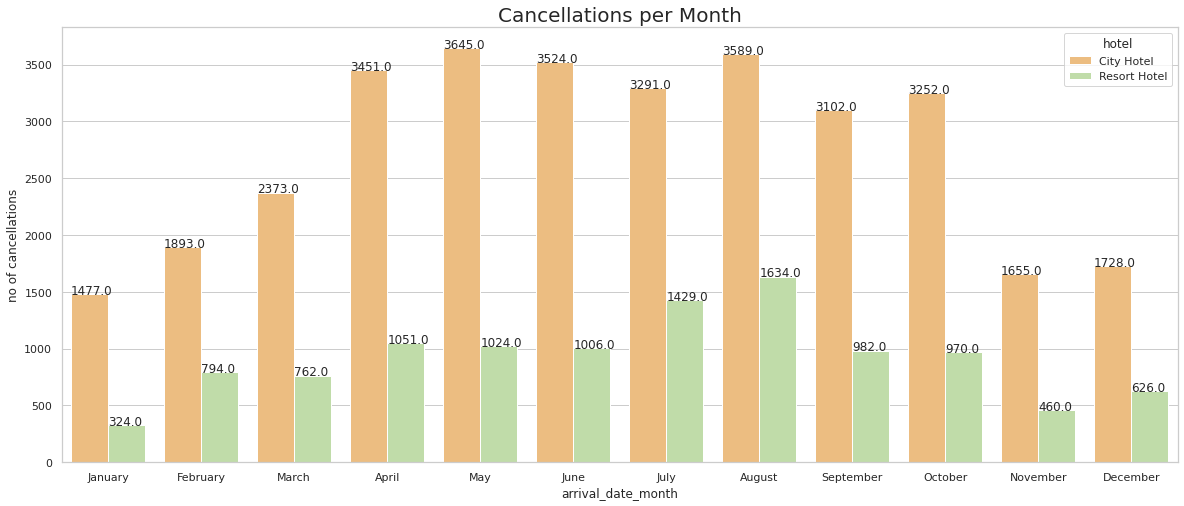

In [ ]:
# Bar Plot
plt.figure(figsize=(20, 8))
plt.title('Cancellations per Month',fontsize=20)
ax = sns.barplot(x = "arrival_date_month", y = "no of cancellations" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=final_cancelled,palette='Spectral')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() ))
plt.show()

#####Conclusion
    Both City and Resort Hotel has highest cancellation of booking during spring and summer.

##### Which Year Has The Highest No Of Cancellation

In [ ]:
canceled=canceled.reset_index()

In [ ]:
canceled.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01,3,2
1,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,0,Transient,105.5,0,0,Canceled,2015-04-22,2015-07-01,3,2
2,10,Resort Hotel,1,23,2015,July,27,1,0,4,...,0,Transient,123.0,0,0,Canceled,2015-06-23,2015-07-01,4,2
3,27,Resort Hotel,1,60,2015,July,27,1,2,5,...,0,Transient,107.0,0,2,Canceled,2015-05-11,2015-07-01,7,2
4,31,Resort Hotel,1,96,2015,July,27,1,2,2,...,0,Transient,108.3,0,2,Canceled,2015-05-29,2015-07-01,4,2


In [ ]:
cancel_year_df = canceled[['hotel','arrival_date_year','index']]
cancel_year_df

,hotel,arrival_date_year,index
0,Resort Hotel,2015,8
1,Resort Hotel,2015,9
2,Resort Hotel,2015,10
3,Resort Hotel,2015,27
4,Resort Hotel,2015,31
...,...,...,...
44037,City Hotel,2017,107970
44038,City Hotel,2017,110483
44039,City Hotel,2017,111047
44040,City Hotel,2017,111048


In [ ]:
cancel_year=cancel_year_df.groupby(['hotel','arrival_date_year']).agg('count').reset_index()

In [ ]:
cancel_year

,hotel,arrival_date_year,index
0,City Hotel,2015,5984
1,City Hotel,2016,15347
2,City Hotel,2017,11649
3,Resort Hotel,2015,2107
4,Resort Hotel,2016,4910
5,Resort Hotel,2017,4045


In [ ]:
cancel_year.rename(columns={'index':'count'},inplace=True)
cancel_year

,hotel,arrival_date_year,count
0,City Hotel,2015,5984
1,City Hotel,2016,15347
2,City Hotel,2017,11649
3,Resort Hotel,2015,2107
4,Resort Hotel,2016,4910
5,Resort Hotel,2017,4045


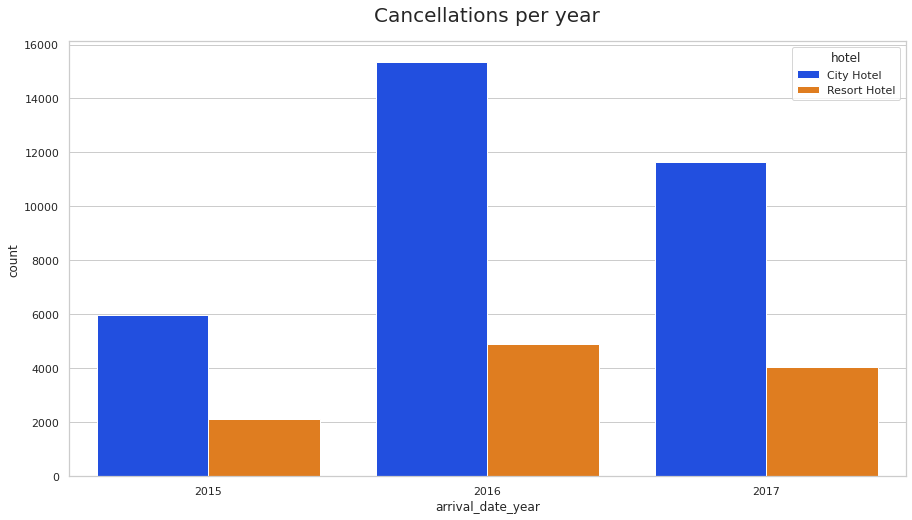

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Cancellations per year',fontsize=20,pad=20)
sns.barplot(x = cancel_year['arrival_date_year'],y=cancel_year['count'],hue=cancel_year['hotel'],palette='bright')
plt.show()

Conclusion -
<br>

2016 has faced haighest number of cancellation 

####Required Car Parking Space ?

In [ ]:
df.required_car_parking_spaces.value_counts()

0    111185
1      7267
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [ ]:
df['required_car_parking_spaces'].replace(to_replace=8,value=3,inplace=True)
df['required_car_parking_spaces'].replace(to_replace=3,value=2,inplace=True)
df['required_car_parking_spaces'].replace(to_replace=2,value=1,inplace=True)

In [ ]:
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.938389
1    0.061611
Name: required_car_parking_spaces, dtype: float64

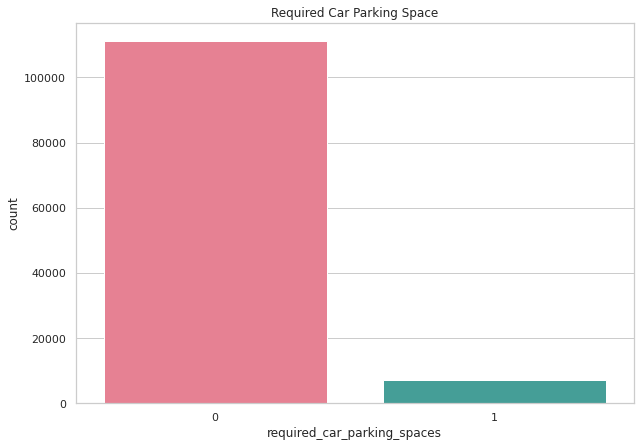

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.title("Required Car Parking Space")
plt.show()

#####*Conclusion*
      Most of the people don't require car parking space.





####Deposite Type ?

In [ ]:
# counting unique values
df.deposit_type.value_counts()

No Deposit    103751
Non Refund     14572
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
# converting values 0 to 1
df.deposit_type.value_counts(normalize=True)

No Deposit    0.875647
Non Refund    0.122986
Refundable    0.001367
Name: deposit_type, dtype: float64

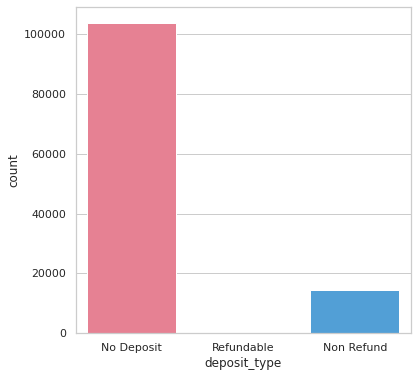

In [ ]:
# plotting a bar plot
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()

#####*Conclusion*
    The Visitors Tends To Prefer for Booking Hotel Which Doesn't require Any Deposite.

####Which was the most booked accommodation type (Single, Couple, Family)?

In [ ]:
# filtering the value
df_not_canceled = df[df['is_canceled'] == 0]

In [ ]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[(df_not_canceled.adults!=0) + df_not_canceled.children + df_not_canceled.babies > 1]


In [ ]:
## Make the list of Category names, and their total percentage
names = ['Single', 'Couple', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

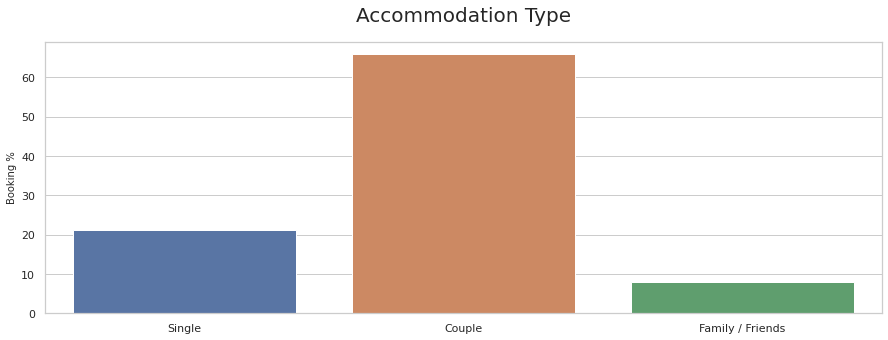

In [ ]:
## Bar Plot
plt.figure(figsize=(15,5))
plt.title('Accommodation Type',fontsize=20,pad=20)
plt.ylabel("Booking %", fontsize=10)
sns.barplot(x = names,y = count_percent )
plt.show()

#####*Conclusion*
    Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly

#### What is the relationship between Special Request and cancellation?

In [ ]:
## Creating a table special request

table_special_req = pd.crosstab(index=df["is_canceled"], 
                                  columns=df["total_of_special_requests"])

display(table_special_req )

total_of_special_requests,0,1,2,3,4,5
is_canceled,,,,,,
0,36355,25699,10021,2031,300,37
1,33442,7281,2843,439,36,1


In [ ]:
# Dropping the column with no special request
table_special_req.drop(0,axis=1, inplace=True)

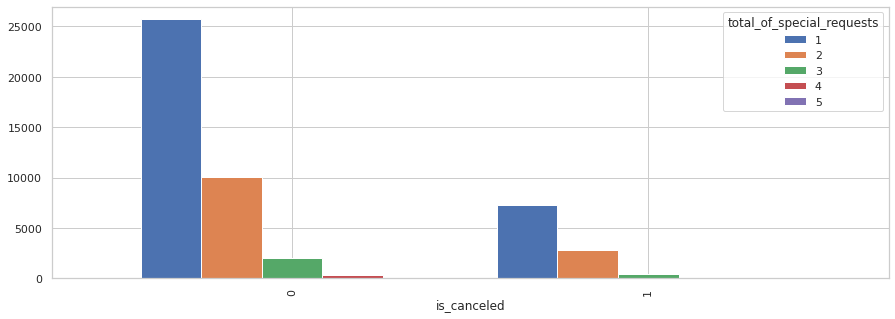

In [ ]:
# Bilateral Bar Plot
table_special_req .plot(kind="bar", 
                 figsize=(15,5),
                 stacked=False,
                 width=0.85)
plt.show()

##### Conclusion-->> 
   
    If we have any special request then the chances of cancellation of booking is less.

####How Long Do People Stay At The Hotels?

In [ ]:
# First Look
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2


In [ ]:
# Adding Two Columns 
data2['total_nights'] = data2['stays_in_weekend_nights'] + data2['stays_in_week_nights']

In [ ]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration,Total_members,total_nights
0,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,0
1,Resort Hotel,0,48,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2,2


In [ ]:
# Creating data frame for the particular analysis
stay = data2.groupby(['total_nights','hotel']).agg('count').reset_index()
stay = stay.iloc[:,0:3]
# First look
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,366
2,1,City Hotel,9131
3,1,Resort Hotel,6367
4,2,City Hotel,10958


In [ ]:
# Renaming the Columns Name
stay = stay.rename(columns={'is_canceled':"No_Of_Stays"})
stay

,total_nights,hotel,No_Of_Stays
0,0,City Hotel,251
1,0,Resort Hotel,366
2,1,City Hotel,9131
3,1,Resort Hotel,6367
4,2,City Hotel,10958
5,2,Resort Hotel,4382
6,3,City Hotel,11860
7,3,Resort Hotel,3895
8,4,City Hotel,7782
9,4,Resort Hotel,3813


In [ ]:
# finding unique value
df['stay_duration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10,  9])

In [ ]:
# counting unique values
df['stay_duration'].value_counts()

2     27487
3     27210
1     20748
4     18238
7      8687
5      8365
6      5227
8      1147
0       640
9       392
10      344
Name: stay_duration, dtype: int64

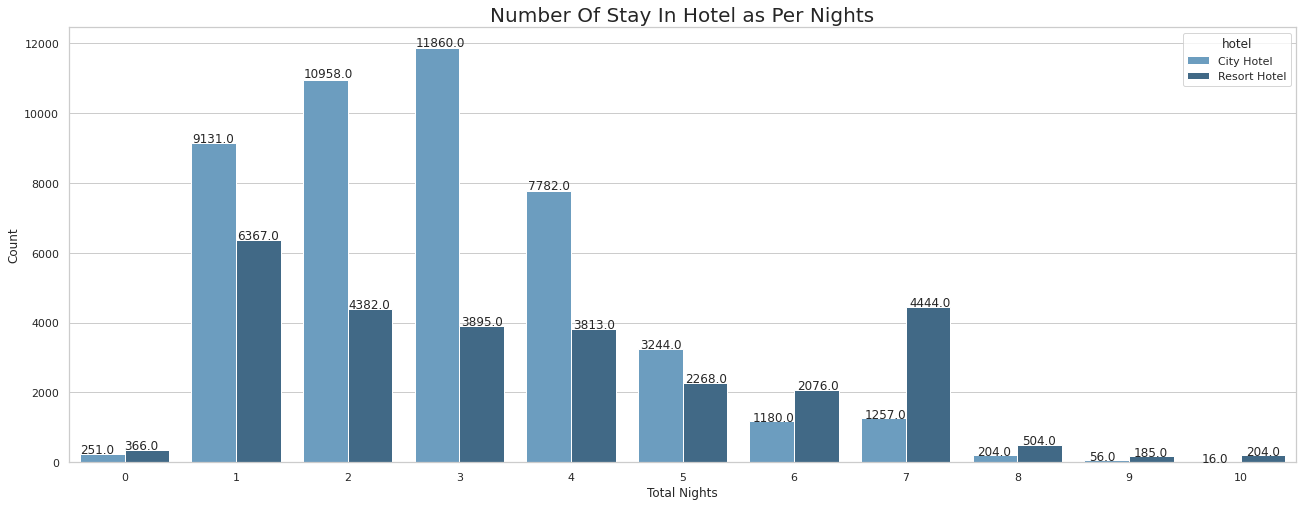

In [ ]:
# Bar Plot
plt.figure(figsize=(22,8))
plt.title("Number Of Stay In Hotel as Per Nights",fontsize=20)
ax = sns.barplot(x='total_nights',y='No_Of_Stays',hue='hotel',hue_order=['City Hotel','Resort Hotel'],data=stay,palette="Blues_d")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel("Total Nights")
plt.ylabel("Count")
plt.show()


#####*Conclusion*
    For Both The hotels, guest prefered to stay less than one week.

####What is the relationship between lead time and cancellation?

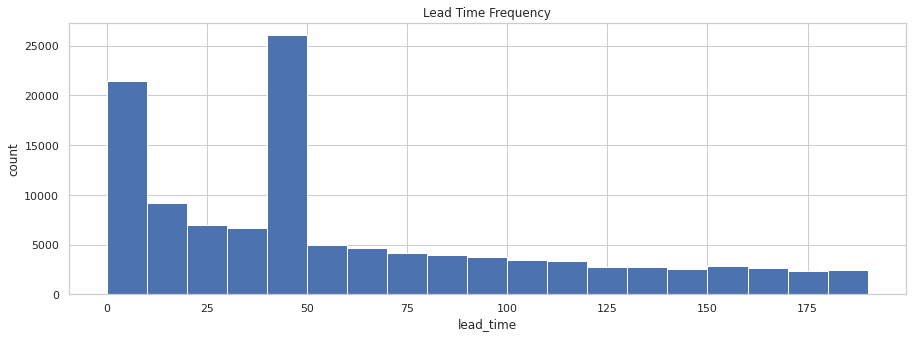

In [ ]:
# plotting the histogram
plt.figure(figsize=(15,5))
plt.hist (df.lead_time, bins= np.arange(0,200,10))
plt.title("Lead Time Frequency")
plt.xlabel('lead_time')
plt.ylabel('count')
plt.show()

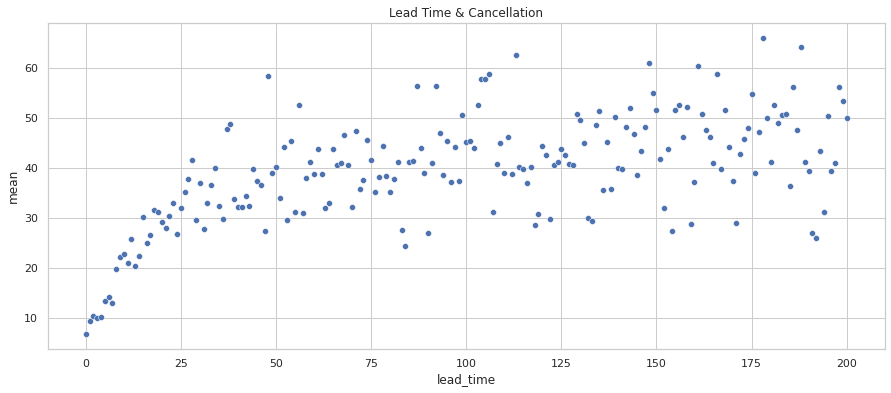

In [ ]:
# plotting the scatter plot b/w mean value and lead_time
a = df.groupby("lead_time")['is_canceled'].describe()
plt.figure(figsize=(15,6))
sns.scatterplot(x=a.index, y=a["mean"] * 100)
plt.title("Lead Time & Cancellation")
plt.show()


### Conclusion   
     Lead time has a positive correlation with cancellation.